In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
#import numpy as np
#import random

In [2]:
model = AbstractModel()
model.N = Param(mutable=True, default=8)
model.i = RangeSet(1, model.N)
model.j = Set(initialize=model.i)
model.U = Var(model.i,model.j, within=Binary, initialize=1)

def Crow_rule(model,i):
    return sum(model.U[i,j] for j in model.j)<=1
model.Crow = Constraint(model.i, rule=Crow_rule)

def Ccol_rule(model,j):
    return sum(model.U[i,j] for i in model.i)<=1
model.Ccol = Constraint(model.j, rule=Ccol_rule )

def Cdiag_rule1(model,i,j):
    totalQueen=0
    for r in model.i:
        for c in model.j:
            if j-c==i-r:
                totalQueen+=model.U[c,r] 
    return totalQueen<=1
model.Cdiag1 = Constraint(model.i,model.j, rule=Cdiag_rule1 )


def Cdiag_rule2(model,i,j):
    totalQueen=0
    for r in model.i:
        for c in model.j:
            if j-c==-(i-r):
                totalQueen+=model.U[c,r] 
    return totalQueen<=1
model.Cdiag2 = Constraint(model.i,model.j, rule=Cdiag_rule2 )

def Obj_rule(model):
    return sum(model.U[i,j] for i in model.i for j in model.j)    
model.obj = Objective(rule=Obj_rule, sense=maximize)
opt = SolverFactory('glpk')

In [5]:
#instance = model.create_instance("EX12.dat")
model.N=14;
instance = model.create_instance()

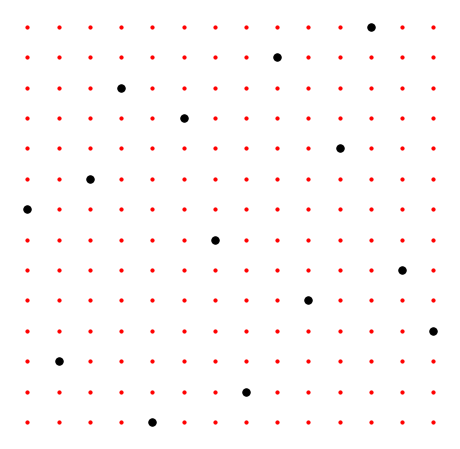

In [6]:
f, ax = plt.subplots(1, 1, figsize = (8,8))
results = opt.solve(instance) # solves and updates instance
for i in instance.i:
    for j in instance.j:
        X=value(instance.U[i,j])
        if X==1:
            plt.scatter( i,j,s=55,color='black')
        else:
            plt.scatter( i,j,s=10,color='red')
plt.axis('off')
plt.show()

In [5]:
f.savefig('NQueen.png', format='png', dpi=1200)

In [6]:
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 22.0
  Upper bound: 22.0
  Number of objectives: 1
  Number of constraints: 1013
  Number of variables: 485
  Number of nonzeros: 15181
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 87
      Number of created subproblems: 87
  Error rc: 0
  Time: 0.317385196685791
# ----------------------------------------------------------
#   Solution Information
# ------------------------------